In [1]:
import pandas as pd
smfile='/Users/irffanalahi/Research/Research_code/gitignorefolder/MHB_per_read/softreadcounting/testtheidea/BL14_all_matrixCin_nr0.4_imputed_rowmean.txt_bg_intesectedwith_CD4DMRofBL14atleast.2SM.txt'
cpgdf=pd.read_csv(smfile,sep="\t",index_col=['chrom','start','end'])
celltype='CD4'

cpgdf=cpgdf.drop(['shouldbechrom','pos'],axis=1)
colnames=cpgdf.columns.tolist()
otherct=colnames[0:colnames.index('DMRchr')]
otherct.remove(celltype)
len(otherct)


13

In [2]:
otherct

['CD8',
 'nB',
 'NK',
 'Mn',
 'mNeu',
 'm8',
 'DC',
 'Eo',
 'Tr',
 'm4',
 'Mg',
 'Er',
 'mB']

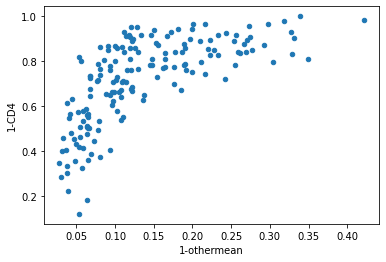

In [3]:
othermean=cpgdf[otherct].mean(axis=1)
cpgdf['othermean']=othermean
cpgdf['1-othermean']=1-cpgdf['othermean']
cpgdf['1-'+celltype]=1-cpgdf[celltype]

cpgdf[celltype+"-othermean"]=cpgdf[celltype]-cpgdf['othermean']

cpgdf.plot.scatter(x='1-othermean',y='1-'+celltype)

In [4]:
cpgdf.to_csv(smfile+"_formatted.txt",sep="\t")